 ## 董事会薪酬激励对企业创新投入的影响
 许思怡、王文超、黎孔霖、吴倩、王雨萌

### Part 1 数据的获取与清洗 
研究数据：875家创业板上市公司2013年至2018年的数据       
数据来源：CSMAR数据库   

（1）下载数据  
（2）分表合并    
（3）过滤缺失值    
（4）变量生成 
<img src="变量定义表.png" width="55%"/>
（5）Winsorize处理  

### Part 2 描述性统计与相关性分析
### Part 3 面板数据回归分析（固定效应模型）

In [26]:
#import necessary packages
import pandas as pd
import os
import math
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from regressors import stats
import statsmodels.api as sm
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [27]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

### Part 1 数据的获取与清洗

In [28]:
path = r"data"
dirs = os.listdir(path)
relative_name_list = []
for file in dirs:
    relative_name_list.append(file)

In [29]:
#读取分表名称
relative_name_list

['Bdsize.csv',
 'DQJL.csv',
 'Dual.csv',
 'Industry.csv',
 'Lev&Cash.csv',
 'Meet.csv',
 'R&D .csv',
 'Roa.csv',
 'Shrcr.csv',
 'Size.csv',
 'TobinQ.csv']

In [30]:
#读取分表数据
datalist=['a0','a1','a2','a3','a4','a4','a5','a6','a7','a8','a9','a10']
for i in range(len(relative_name_list)):
    datalist[i] = pd.read_csv(path + "\\" + relative_name_list[i])
    datalist[i].set_index(["Stkcd", "Reptdt"], inplace = True)

In [31]:
for i in range(len(relative_name_list)):
    print(relative_name_list[i])
    display(datalist[i].head())

Bdsize.csv


,,num_of_dir
Stkcd,Reptdt,
300108,2013/12/31,7
300181,2013/12/31,9
300044,2013/12/31,9
300267,2013/12/31,9
300286,2013/12/31,7


DQJL.csv


,,Salary
Stkcd,Reptdt,
300108,2013/12/31,300000.000
300181,2013/12/31,1121500.000
300044,2013/12/31,987400.000
300267,2013/12/31,1110000.000
300286,2013/12/31,810800.000


Dual.csv


,,Dual
Stkcd,Reptdt,
300108,2013/12/31,1.000
300181,2013/12/31,2.000
300044,2013/12/31,2.000
300267,2013/12/31,1.000
300286,2013/12/31,1.000


Industry.csv


,,Indcd,Code,Date
Stkcd,Reptdt,,,
300108,2013/12/31,C26,300108,2013/12/31
300181,2013/12/31,C27,300181,2013/12/31
300044,2013/12/31,I65,300044,2013/12/31
300267,2013/12/31,C27,300267,2013/12/31
300286,2013/12/31,C40,300286,2013/12/31


Lev&Cash.csv


,,Lev,Cash
Stkcd,Reptdt,,
300108,2013/12/31,0.146,0.427
300181,2013/12/31,0.180,0.180
300044,2013/12/31,0.364,0.008
300267,2013/12/31,0.078,1.870
300286,2013/12/31,0.099,1.780


Meet.csv


,,Num_of_meet
Stkcd,Reptdt,
300108,2013/12/31,9
300181,2013/12/31,4
300044,2013/12/31,11
300267,2013/12/31,13
300228,2013/12/31,11


R&D .csv


,,RDSpendSum
Stkcd,Reptdt,
300001,2015/12/31,100201114.200
300002,2015/12/31,217190807.100
300003,2015/12/31,172445847.400
300004,2015/12/31,38505021.640
300005,2015/12/31,74568983.050


Roa.csv


,,Roa
Stkcd,Reptdt,
300108,2013/12/31,0.063
300181,2013/12/31,0.090
300044,2013/12/31,0.036
300267,2013/12/31,0.144
300286,2013/12/31,0.138


Shrcr.csv


Shrcr
Stkcd  Reptdt           
300328 2013/12/31  0.591
       2014/12/31  0.591
300286 2013/12/31  0.220
       2014/12/31  0.220
300044 2013/12/31  0.195

Size.csv


,,Asset
Stkcd,Reptdt,
300181,2013/12/31,941897223.300
300108,2013/12/31,465831664.200
300044,2013/12/31,1004720664.000
300267,2013/12/31,1447001098.000
300286,2013/12/31,509275104.700


TobinQ.csv


,,TobinQ
Stkcd,Reptdt,
300181,2013/12/31,3.058
300267,2013/12/31,2.645
300286,2013/12/31,2.435
300228,2013/12/31,2.933
300263,2013/12/31,1.574


In [32]:
#分表合并
com_data = pd.concat([datalist[0], datalist[1], datalist[2], 
                      datalist[3], datalist[4], datalist[5], 
                      datalist[6], datalist[7], datalist[8], 
                      datalist[9], datalist[10]],axis=1)
com_data_drop = com_data.dropna()
com_data_drop.head()

num_of_dir      Salary  Dual Indcd    Code        Date  \
Stkcd  Reptdt                                                               
300001 2013/12/31           9 1424900.000 2.000   C38  300001  2013/12/31   
       2014/12/31           9 1680600.000 2.000   C38  300001  2014/12/31   
       2015/12/31           9 1866900.000 2.000   C38  300001  2015/12/31   
       2016/12/31           9 2144100.000 2.000   C38  300001  2016/12/31   
       2017/12/31           9 2282100.000 2.000   C38  300001  2017/12/31   

                    Lev  Cash  Num_of_meet    RDSpendSum   Roa  Shrcr  \
Stkcd  Reptdt                                                           
300001 2013/12/31 0.388 0.108            7  37710464.970 0.067  0.498   
       2014/12/31 0.483 0.095            7  67603122.560 0.067  0.498   
       2015/12/31 0.582 0.123           17 100201114.200 0.029  0.438   
       2016/12/31 0.748 0.062           13 172749292.100 0.021  0.440   
       2017/12/31 0.731 0.006           15 220249681.500 0.019  0.440   

                            Asset  TobinQ  
Stkcd  Reptdt                              
300001 2013/12/31  2322127099.000   2.311  
       2014/12/31  3030165356.000   2.869  
       2015/12/31  6402222039.000   4.390  
       2016/12/31 11736868241.000   2.039  
       2017/12/31 12275033813.000   1.735

In [33]:
#过滤缺失值
print(com_data.shape)
print(com_data_drop.shape)

(3313, 14)
(2746, 14)


In [34]:
#变量生成
data_var_process=com_data_drop.copy()
data_var_process['Industry'] = data_var_process['Indcd'].apply(lambda x:x[0])
data_var_process.eval('''
            RDD1 = RDSpendSum / Asset
            DQJL =log(Salary+1)
            Size=log(Asset)
            Bdsize=log(num_of_dir)
            Meet=log(Num_of_meet)
                                   ''',inplace = True)
data_var_process.head()

num_of_dir      Salary  Dual Indcd    Code        Date  \
Stkcd  Reptdt                                                               
300001 2013/12/31           9 1424900.000 2.000   C38  300001  2013/12/31   
       2014/12/31           9 1680600.000 2.000   C38  300001  2014/12/31   
       2015/12/31           9 1866900.000 2.000   C38  300001  2015/12/31   
       2016/12/31           9 2144100.000 2.000   C38  300001  2016/12/31   
       2017/12/31           9 2282100.000 2.000   C38  300001  2017/12/31   

                    Lev  Cash  Num_of_meet    RDSpendSum   Roa  Shrcr  \
Stkcd  Reptdt                                                           
300001 2013/12/31 0.388 0.108            7  37710464.970 0.067  0.498   
       2014/12/31 0.483 0.095            7  67603122.560 0.067  0.498   
       2015/12/31 0.582 0.123           17 100201114.200 0.029  0.438   
       2016/12/31 0.748 0.062           13 172749292.100 0.021  0.440   
       2017/12/31 0.731 0.006           15 220249681.500 0.019  0.440   

                            Asset  TobinQ Industry  RDD1   DQJL   Size  \
Stkcd  Reptdt                                                            
300001 2013/12/31  2322127099.000   2.311        C 0.016 14.170 21.566   
       2014/12/31  3030165356.000   2.869        C 0.022 14.335 21.832   
       2015/12/31  6402222039.000   4.390        C 0.016 14.440 22.580   
       2016/12/31 11736868241.000   2.039        C 0.015 14.578 23.186   
       2017/12/31 12275033813.000   1.735        C 0.018 14.641 23.231   

                   Bdsize  Meet  
Stkcd  Reptdt                    
300001 2013/12/31   2.197 1.946  
       2014/12/31   2.197 1.946  
       2015/12/31   2.197 2.833  
       2016/12/31   2.197 2.565  
       2017/12/31   2.197 2.708

In [35]:
#使用get_dummies进行one-hot编码
data_var_process=pd.get_dummies(data_var_process,columns=['Dual'],drop_first=True)
data_var_process.head()

num_of_dir      Salary Indcd    Code        Date   Lev  \
Stkcd  Reptdt                                                               
300001 2013/12/31           9 1424900.000   C38  300001  2013/12/31 0.388   
       2014/12/31           9 1680600.000   C38  300001  2014/12/31 0.483   
       2015/12/31           9 1866900.000   C38  300001  2015/12/31 0.582   
       2016/12/31           9 2144100.000   C38  300001  2016/12/31 0.748   
       2017/12/31           9 2282100.000   C38  300001  2017/12/31 0.731   

                   Cash  Num_of_meet    RDSpendSum   Roa  Shrcr  \
Stkcd  Reptdt                                                     
300001 2013/12/31 0.108            7  37710464.970 0.067  0.498   
       2014/12/31 0.095            7  67603122.560 0.067  0.498   
       2015/12/31 0.123           17 100201114.200 0.029  0.438   
       2016/12/31 0.062           13 172749292.100 0.021  0.440   
       2017/12/31 0.006           15 220249681.500 0.019  0.440   

                            Asset  TobinQ Industry  RDD1   DQJL   Size  \
Stkcd  Reptdt                                                            
300001 2013/12/31  2322127099.000   2.311        C 0.016 14.170 21.566   
       2014/12/31  3030165356.000   2.869        C 0.022 14.335 21.832   
       2015/12/31  6402222039.000   4.390        C 0.016 14.440 22.580   
       2016/12/31 11736868241.000   2.039        C 0.015 14.578 23.186   
       2017/12/31 12275033813.000   1.735        C 0.018 14.641 23.231   

                   Bdsize  Meet  Dual_2.0  
Stkcd  Reptdt                              
300001 2013/12/31   2.197 1.946         1  
       2014/12/31   2.197 1.946         1  
       2015/12/31   2.197 2.833         1  
       2016/12/31   2.197 2.565         1  
       2017/12/31   2.197 2.708         1

In [36]:
data_before_win=data_var_process.reset_index(drop=True)

In [37]:
#对连续性变量进行1%分位和99%分位的Winsorize处理
from scipy.stats.mstats import winsorize
win = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
df = ['df1','df2','df3','df4','df5','df6','df7','df8','df9','df10']
list_win = ["RDD1","DQJL","Size","Roa","Lev","TobinQ","Cash","Shrcr","Bdsize","Meet"]
data_win = data_before_win.loc[:,list_win]

for i in range(0,10):
    win[i] = winsorize(np.array(data_win.iloc[:,i:i+1]),limits = [0.01,0.01])
    df[i]=pd.DataFrame(win[i]).sort_values(by = 0,ascending=False)
    
for i in range(0,10):
    data_before_win = pd.concat([data_before_win.sort_values(by = list_win[i],ascending=False),df[i]], axis=1)
    
data_after_win = data_before_win.copy()
data_after_win.columns.values

array(['num_of_dir', 'Salary', 'Indcd', 'Code', 'Date', 'Lev', 'Cash',
       'Num_of_meet', 'RDSpendSum', 'Roa', 'Shrcr', 'Asset', 'TobinQ',
       'Industry', 'RDD1', 'DQJL', 'Size', 'Bdsize', 'Meet', 'Dual_2.0',
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [38]:
data_after_win = data_after_win.drop(list_win,axis=1)
data_after_win.columns = ['num_of_dir', 'Salary', 'Indcd', 'Code', 'Date','Num_of_meet', 'RDSpendSum','Asset','Industry','Dual',
                      "RDD1","DQJL","Size","Roa","Lev","TobinQ","Cash","Shrcr","Bdsize","Meet"]

In [39]:
final_data=data_after_win.copy()
final_data.Date=pd.to_datetime(final_data.Date,format='%Y-%m-%d')
final_data['Year'] = final_data['Date'].dt.year
final_data.head()

,num_of_dir,Salary,Indcd,Code,Date,Num_of_meet,RDSpendSum,Asset,Industry,Dual,RDD1,DQJL,Size,Roa,Lev,TobinQ,Cash,Shrcr,Bdsize,Meet,Year
0,9,1424900.000,C38,300001,2013-12-31,7,37710464.970,2322127099.000,C,1,0.016,14.170,21.566,0.067,0.388,2.311,0.108,0.498,2.197,1.946,2013
1,9,1680600.000,C38,300001,2014-12-31,7,67603122.560,3030165356.000,C,1,0.022,14.335,21.832,0.067,0.483,2.869,0.095,0.498,2.197,1.946,2014
2,9,1866900.000,C38,300001,2015-12-31,17,100201114.200,6402222039.000,C,1,0.016,14.440,22.580,0.029,0.582,4.390,0.123,0.438,2.197,2.833,2015
3,9,2144100.000,C38,300001,2016-12-31,13,172749292.100,11736868241.000,C,1,0.015,14.578,23.186,0.021,0.744,2.039,0.062,0.440,2.197,2.565,2016
4,9,2282100.000,C38,300001,2017-12-31,15,220249681.500,12275033813.000,C,1,0.018,14.641,23.231,0.019,0.731,1.735,0.006,0.440,2.197,2.708,2017


### Part 2 描述性统计与相关性分析

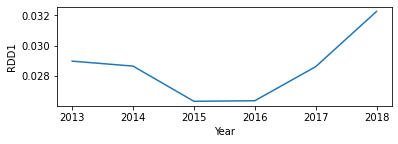

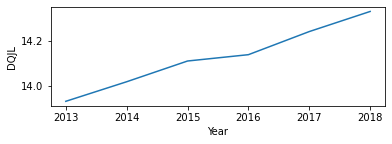

In [40]:
# RDD1和DQJL按年计算均值，均值随年份的变化
data_mean=final_data.groupby('Year')['RDD1'].mean().reset_index()
plt.subplot(211)
plt.plot(data_mean['Year'],data_mean['RDD1'])
plt.xlabel('Year')
plt.ylabel('RDD1')
plt.show()

data_md=final_data.groupby('Year')['DQJL'].mean().reset_index()
plt.subplot(212)
plt.plot(data_md['Year'],data_md['DQJL'])
plt.xlabel('Year')
plt.ylabel('DQJL')
plt.show()

In [41]:
#2013年-2018年创业板公司的行业分布（基于个数）
hyfb1 =final_data.pivot_table(values='Code', index = ['Industry'], columns=['Year'], aggfunc = ['count'] )
hyfb1.fillna(value=0)

count                                        
Year        2013    2014    2015    2016    2017    2018
Industry                                                
A          5.000   4.000   5.000   7.000   7.000   6.000
B          4.000   4.000   4.000   4.000   4.000   3.000
C        236.000 243.000 269.000 320.000 390.000 489.000
D          1.000   1.000   2.000   2.000   2.000   2.000
E          5.000   5.000   5.000   8.000   8.000   7.000
F          2.000   2.000   3.000   4.000   5.000   4.000
G          3.000   2.000   3.000   3.000   0.000   2.000
I         54.000  60.000  66.000  80.000 107.000 128.000
L          2.000   3.000   3.000   5.000   5.000   9.000
M          6.000   6.000   6.000   8.000   8.000  16.000
N          5.000   4.000   5.000   7.000   8.000  14.000
O          0.000   0.000   0.000   0.000   0.000   1.000
Q          2.000   2.000   3.000   3.000   3.000   3.000
R          1.000   3.000   4.000   4.000   6.000  11.000

In [42]:
#2013年-2018年创业板公司的行业分布（基于比率）
hyfb2 =pd.DataFrame(final_data.groupby(['Year','Industry'])['Code'].count()/final_data.groupby(['Year'])['Code'].count())
hyfb2.columns=['Company_ratio']
hyfb2.reset_index()
hyfb3 =hyfb2.pivot_table(values=['Company_ratio'], index = ['Industry'], columns=['Year'] )
hyfb3.fillna(value=0)

Company_ratio                              
Year              2013  2014  2015  2016  2017  2018
Industry                                            
A                0.015 0.012 0.013 0.015 0.013 0.009
B                0.012 0.012 0.011 0.009 0.007 0.004
C                0.724 0.717 0.712 0.703 0.705 0.704
D                0.003 0.003 0.005 0.004 0.004 0.003
E                0.015 0.015 0.013 0.018 0.014 0.010
F                0.006 0.006 0.008 0.009 0.009 0.006
G                0.009 0.006 0.008 0.007 0.000 0.003
I                0.166 0.177 0.175 0.176 0.193 0.184
L                0.006 0.009 0.008 0.011 0.009 0.013
M                0.018 0.018 0.016 0.018 0.014 0.023
N                0.015 0.012 0.013 0.015 0.014 0.020
O                0.000 0.000 0.000 0.000 0.000 0.001
Q                0.006 0.006 0.008 0.007 0.005 0.004
R                0.003 0.009 0.011 0.009 0.011 0.016

In [43]:
for i in range(2013, 2019):
    print ("%d年C、I两个行业公司占比为：%.4f"%(i, (hyfb2.loc[(i, 'C'),'Company_ratio']+hyfb2.loc[(i, 'I'),'Company_ratio'])))

2013年C、I两个行业公司占比为：0.8896
2014年C、I两个行业公司占比为：0.8938
2015年C、I两个行业公司占比为：0.8862
2016年C、I两个行业公司占比为：0.8791
2017年C、I两个行业公司占比为：0.8987
2018年C、I两个行业公司占比为：0.8878


制造业（C）与信息传输、软件与信息技术服务业（I）占比达到近90%

In [44]:
final_data1 = final_data[['Code','Year',"RDD1","DQJL","Size","Roa","Lev","TobinQ","Cash","Shrcr","Bdsize","Meet",'Dual']]
final_data1.head()

,Code,Year,RDD1,DQJL,Size,Roa,Lev,TobinQ,Cash,Shrcr,Bdsize,Meet,Dual
0,300001,2013,0.016,14.170,21.566,0.067,0.388,2.311,0.108,0.498,2.197,1.946,1
1,300001,2014,0.022,14.335,21.832,0.067,0.483,2.869,0.095,0.498,2.197,1.946,1
2,300001,2015,0.016,14.440,22.580,0.029,0.582,4.390,0.123,0.438,2.197,2.833,1
3,300001,2016,0.015,14.578,23.186,0.021,0.744,2.039,0.062,0.440,2.197,2.565,1
4,300001,2017,0.018,14.641,23.231,0.019,0.731,1.735,0.006,0.440,2.197,2.708,1


In [45]:
#描述性统计分析
data_descriptive=final_data1.drop(columns=['Year','Code'])
data_descriptive.describe()

,RDD1,DQJL,Size,Roa,Lev,TobinQ,Cash,Shrcr,Bdsize,Meet,Dual
count,2746.000,2746.000,2746.000,2746.000,2746.000,2746.000,2746.000,2746.000,2746.000,2746.000,2746.000
mean,0.029,14.164,21.356,0.048,0.311,2.497,0.234,0.304,2.057,2.253,0.578
std,0.021,0.577,0.785,0.067,0.167,1.351,0.425,0.122,0.189,0.368,0.494
min,0.002,12.800,19.914,-0.297,0.044,1.052,-0.546,0.081,1.609,1.386,0.000
25%,0.016,13.795,20.767,0.024,0.175,1.586,0.002,0.212,1.946,2.079,0.000
50%,0.023,14.154,21.272,0.051,0.288,2.084,0.138,0.289,2.079,2.303,1.000
75%,0.035,14.522,21.848,0.080,0.430,2.940,0.357,0.388,2.197,2.485,1.000
max,0.116,15.659,23.554,0.200,0.744,8.338,2.146,0.614,2.485,3.135,1.000


1. 被解释变量企业创新投入强度(RDD1)在2013年至2018年中，最小值为0.2%，最大值为11.6%，说明不同企业之间创新强度有一定的区别；RDD1均值（2.9%）大于中位数（2.3%），说明少部分企业创新投入强度较高，提高了创业板上市公司创新投入强度的均值，但我国创业板上市公司总体创新投入强度较低；   
2. 解释变量董事会薪酬激励(DQJL)均值14.164，中位数为14.154，且最大值和最小值差异较小，说明董事会薪酬激励分布较为均匀；    
3. 企业规模（Size）、总资产利润率（Roa）、资产负债率（Lev）、债务保障率（Cash）、成长性（TobinQ）、股权集中度（Shrcr）极差较大，这体现出企业之间的个体差异，说明控制变量设置较为合理。

In [51]:
#相关性分析
data_descriptive.corr()

,RDD1,DQJL,Size,Roa,Lev,TobinQ,Cash,Shrcr,Bdsize,Meet,Dual
RDD1,1.000,0.126,-0.219,0.086,-0.157,0.208,0.074,-0.080,-0.051,-0.064,-0.067
DQJL,0.126,1.000,0.351,0.114,0.078,-0.046,0.050,-0.135,0.171,0.112,0.078
Size,-0.219,0.351,1.000,-0.055,0.455,-0.258,-0.174,-0.157,0.120,0.397,0.107
Roa,0.086,0.114,-0.055,1.000,-0.282,0.228,0.363,0.132,0.062,-0.045,-0.012
Lev,-0.157,0.078,0.455,-0.282,1.000,-0.222,-0.481,-0.021,0.044,0.334,0.021
TobinQ,0.208,-0.046,-0.258,0.228,-0.222,1.000,0.229,0.036,-0.061,-0.009,0.001
Cash,0.074,0.050,-0.174,0.363,-0.481,0.229,1.000,0.066,-0.029,-0.175,-0.009
Shrcr,-0.080,-0.135,-0.157,0.132,-0.021,0.036,0.066,1.000,-0.116,-0.087,-0.124
Bdsize,-0.051,0.171,0.120,0.062,0.044,-0.061,-0.029,-0.116,1.000,-0.071,0.073
Meet,-0.064,0.112,0.397,-0.045,0.334,-0.009,-0.175,-0.087,-0.071,1.000,0.006


In [53]:
import scipy.stats as stats
stats.pearsonr(data_descriptive['DQJL'],data_descriptive['RDD1'])
#输出结果第一个值为pearson相关系数，第二个值为p-value

(0.12568961990082772, 3.852249558160998e-11)

### Part 3 面板数据回归分析（固定效应模型）

In [47]:
Year=pd.Categorical(final_data1.Year)
data_regression=final_data1.set_index(['Code','Year'])
data_regression['Year']=Year
data_regression.head(20)

RDD1   DQJL   Size   Roa   Lev  TobinQ  Cash  Shrcr  Bdsize  \
Code   Year                                                                
300001 2013 0.016 14.170 21.566 0.067 0.388   2.311 0.108  0.498   2.197   
       2014 0.022 14.335 21.832 0.067 0.483   2.869 0.095  0.498   2.197   
       2015 0.016 14.440 22.580 0.029 0.582   4.390 0.123  0.438   2.197   
       2016 0.015 14.578 23.186 0.021 0.744   2.039 0.062  0.440   2.197   
       2017 0.018 14.641 23.231 0.019 0.731   1.735 0.006  0.440   2.197   
       2018 0.018 14.798 23.316 0.015 0.736   1.968 0.084  0.399   2.197   
300002 2013 0.051 14.066 22.149 0.134 0.133   3.011 0.849  0.138   2.398   
       2014 0.047 14.230 22.435 0.124 0.109   2.698 0.604  0.127   2.485   
       2015 0.037 14.369 22.499 0.051 0.156   2.918 0.084  0.129   2.485   
       2016 0.028 14.146 22.674 0.073 0.284   2.243 0.063  0.131   2.398   
       2017 0.030 14.077 22.658 0.014 0.258   1.699 0.286  0.131   2.398   
       2018 0.034 14.367 22.616 0.012 0.212   1.134 0.171  0.132   2.398   
300003 2013 0.032 13.574 21.864 0.125 0.075   3.892 1.804  0.289   1.946   
       2014 0.037 13.199 22.066 0.130 0.140   4.537 0.903  0.219   2.079   
       2015 0.022 13.171 22.768 0.103 0.309   3.843 0.298  0.219   1.792   
       2016 0.024 12.800 22.975 0.087 0.367   3.091 0.235  0.204   1.792   
       2017 0.023 12.982 23.272 0.089 0.451   3.231 0.197  0.200   1.946   
       2018 0.031 13.122 23.439 0.090 0.564   2.570 0.210  0.137   1.946   
300004 2013 0.019 13.617 20.897 0.040 0.246   4.622 0.209  0.218   2.197   
       2014 0.009 13.914 22.051 0.043 0.200   2.056 0.353  0.132   2.079   

             Meet  Dual  Year  
Code   Year                    
300001 2013 1.946     1  2013  
       2014 1.946     1  2014  
       2015 2.833     1  2015  
       2016 2.565     1  2016  
       2017 2.708     1  2017  
       2018 2.485     1  2018  
300002 2013 2.996     1  2013  
       2014 3.135     1  2014  
       2015 3.135     1  2015  
       2016 3.135     1  2016  
       2017 2.833     1  2017  
       2018 2.773     1  2018  
300003 2013 2.079     1  2013  
       2014 2.079     0  2014  
       2015 2.565     0  2015  
       2016 2.303     0  2016  
       2017 2.197     0  2017  
       2018 2.565     0  2018  
300004 2013 2.079     0  2013  
       2014 2.398     0  2014

In [48]:
data_regression.columns.values

array(['RDD1', 'DQJL', 'Size', 'Roa', 'Lev', 'TobinQ', 'Cash', 'Shrcr',
       'Bdsize', 'Meet', 'Dual', 'Year'], dtype=object)

In [49]:
!pip install linearmodels
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
exog = sm.add_constant(data_regression[['DQJL', 'Dual', 'Size', 'Roa', 'Lev', 'TobinQ',
                              'Cash', 'Shrcr', 'Bdsize', 'Meet']])
grunfeld_fet = PanelOLS(data_regression['RDD1'], exog, entity_effects=True, time_effects=True)
grunfeld_fet = grunfeld_fet.fit()
print(grunfeld_fet)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   RDD1   R-squared:                        0.1142
Estimator:                   PanelOLS   R-squared (Between):              0.0970
No. Observations:                2746   R-squared (Within):               0.0611
Date:                Wed, Nov 25 2020   R-squared (Overall):              0.0915
Time:                        22:46:25   Log-likelihood                    9667.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      26.124
Entities:                         705   P-value                           0.0000
Avg Obs:                       3.8950   Distribution:                 F(10,2026)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             26.124
                            

董事会薪酬激励（DQJL）项系数为0.0031（t=4.5228），在1%水平上显著为正，说明在控制其他变量的情况下，提高董事会薪酬激励有利于提高企业创新投入强度。